In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../')

import emulatte as emu
from emulatte.source import HGW

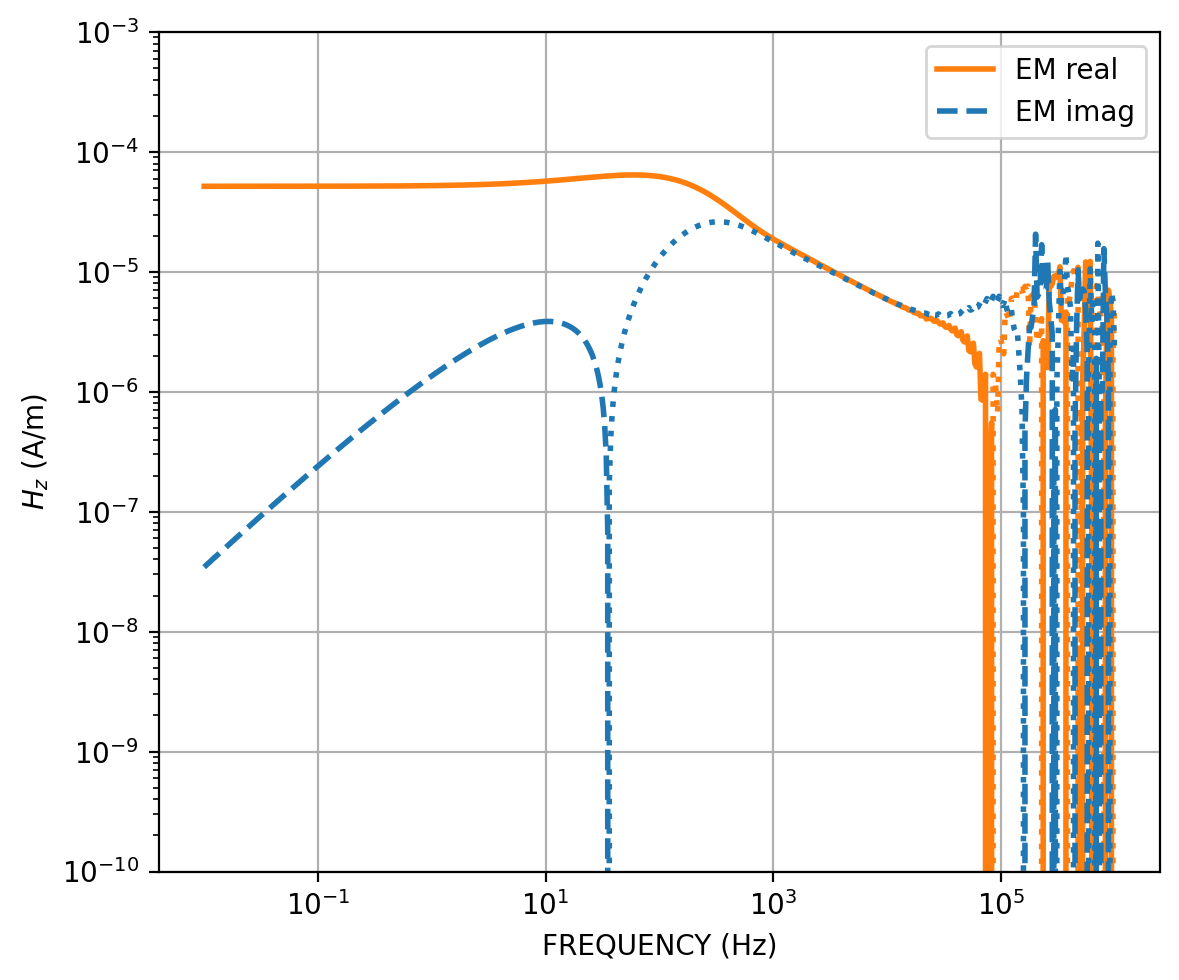

CPU times: user 2.05 s, sys: 900 ms, total: 2.95 s
Wall time: 1.73 s


In [2]:
%%time
src = [[500,0,0], [-500,0,0]]
rec = [0,1000,0]
thicks = [1000,100]
res = [100,100,100]
drc = "y"

freq = np.logspace(-2, 6, 601)
model = emu.create_model(thicks)
gw = HGW(1)
# ここでFDTD, waveformを決める
# ontime > 0 : step-on, = 0 : impluse, < 0 : step-off, array-like :  arbitorary_wave, None : FD
# ontimeの設定はloopとlineのみ

model.set_params(res)
model.set_source(gw, src)
# 今後のことを考えて、デジタルフィルタ（Hankel, Fourier）は外から適用できるように「も」する
model.set_filter(hankel_filter='key201')
EMF = model.field("H", drc, rec, freq)
#emulatte

fig = plt.figure(figsize=(6,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(freq, EMF.real, "C1-", label='EM real', linewidth=2)
ax.plot(freq, -EMF.real, "C1:", linewidth=2)
ax.plot(freq, EMF.imag, "C0--", label='EM imag', linewidth=2)
ax.plot(freq, -EMF.imag, "C0:", linewidth=2)

ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim([1e-1, 1e5])
ax.set_ylim([1e-10, 1e-3])
ax.set_xlabel('FREQUENCY (Hz)')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()
ax.grid()
plt.tight_layout()

plt.show()

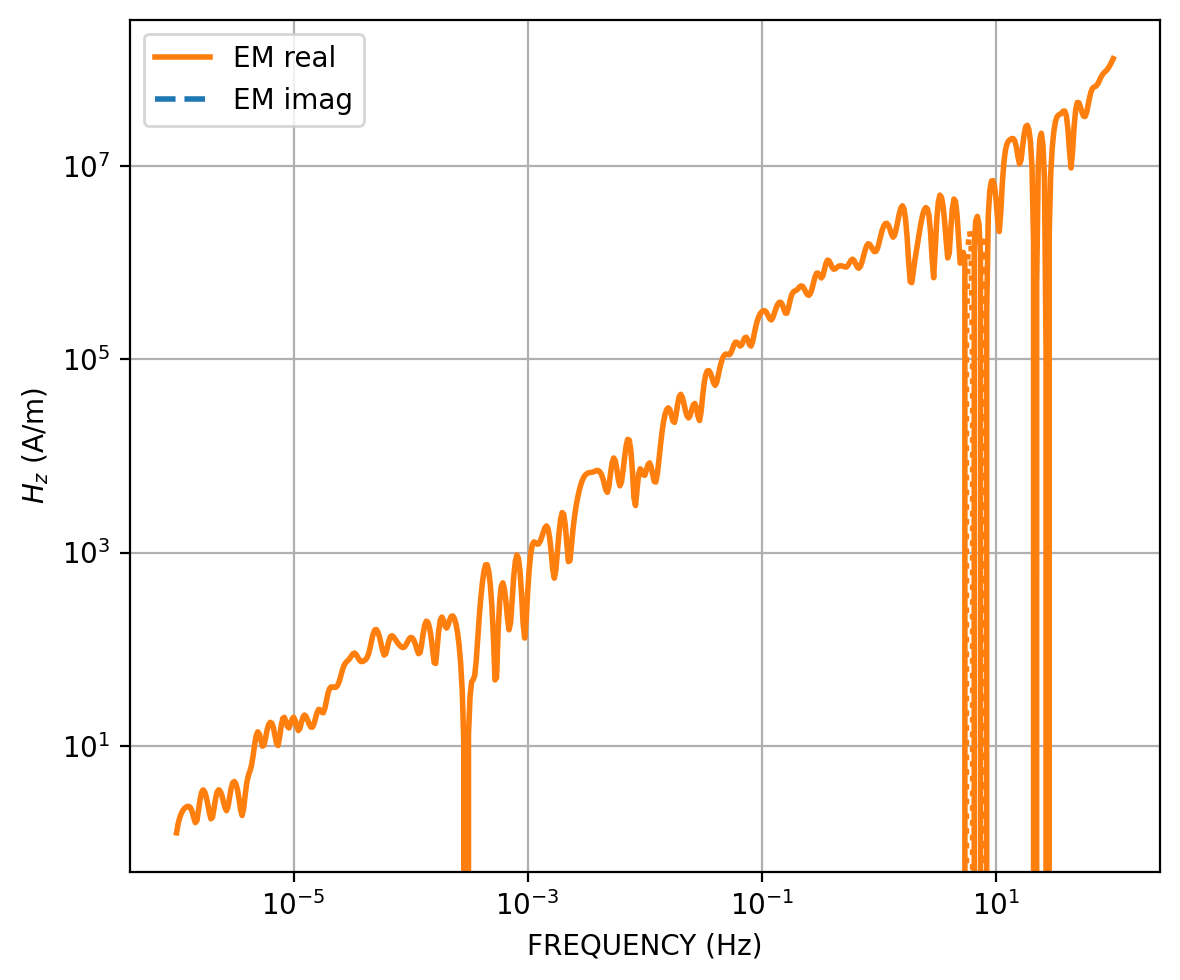

CPU times: user 4.89 s, sys: 3.27 s, total: 8.16 s
Wall time: 7.68 s


In [3]:
%%time
time = np.logspace(-6, 2, 601)
model = emu.create_model(thicks)
gw = HGW(1, ontime=-1, split=20)
# ここでFDTD, waveformを決める
# ontime > 0 : step-on, = 0 : impluse, < 0 : step-off, array-like :  arbitorary_wave, None : FD
# ontimeの設定はloopとlineのみ

model.set_params(res)
model.set_source(gw, src)
# 今後のことを考えて、デジタルフィルタ（Hankel, Fourier）は外から適用できるように「も」する
model.set_filter(hankel_filter='key201')
EMF = model.field("H", drc, rec, time)
#emulatte

fig = plt.figure(figsize=(6,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(time, EMF.real, "C1-", label='EM real', linewidth=2)
ax.plot(time, -EMF.real, "C1:", linewidth=2)
ax.plot(time, EMF.imag, "C0--", label='EM imag', linewidth=2)
ax.plot(time, -EMF.imag, "C0:", linewidth=2)

ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim([1e-1, 1e5])
#ax.set_ylim([1e-10, 1e-3])
ax.set_xlabel('FREQUENCY (Hz)')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()
ax.grid()
plt.tight_layout()

plt.show()